El archivo contiene diferenciadas 9 categorías -actividades laborales- que son:

1. Actor/actriz
2. Cantante
3. Modelo
4. Tv, series
5. Radio
6. Tecnología
7. Deportes
8. Politica
9. Escritor

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
data = pd.read_csv("analisis.csv")

print("Dimension de los datos: ",len(data))

data.head()

Dimension de los datos:  140


,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [3]:
data.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678867,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [4]:
data.groupby('categoria').size()

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64

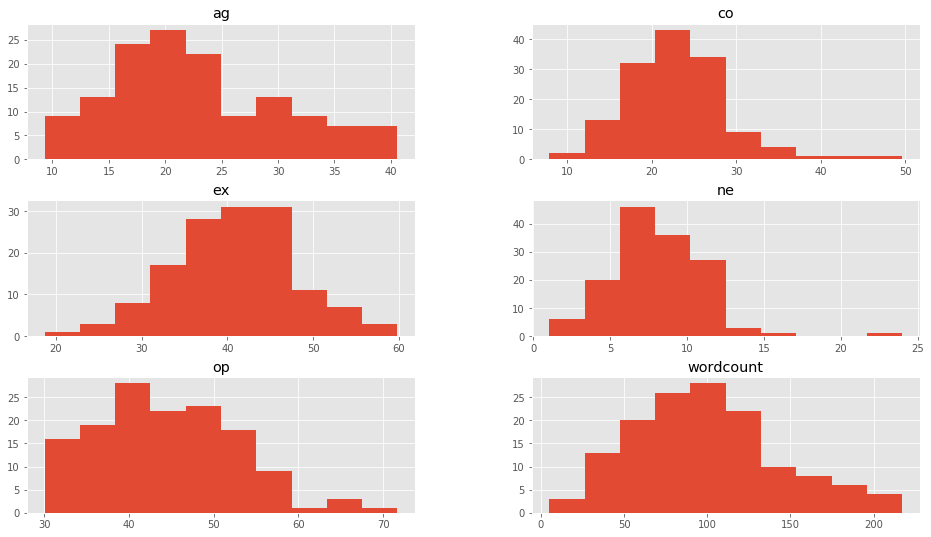

In [9]:
data.drop(['categoria'],1).hist()
plt.show()

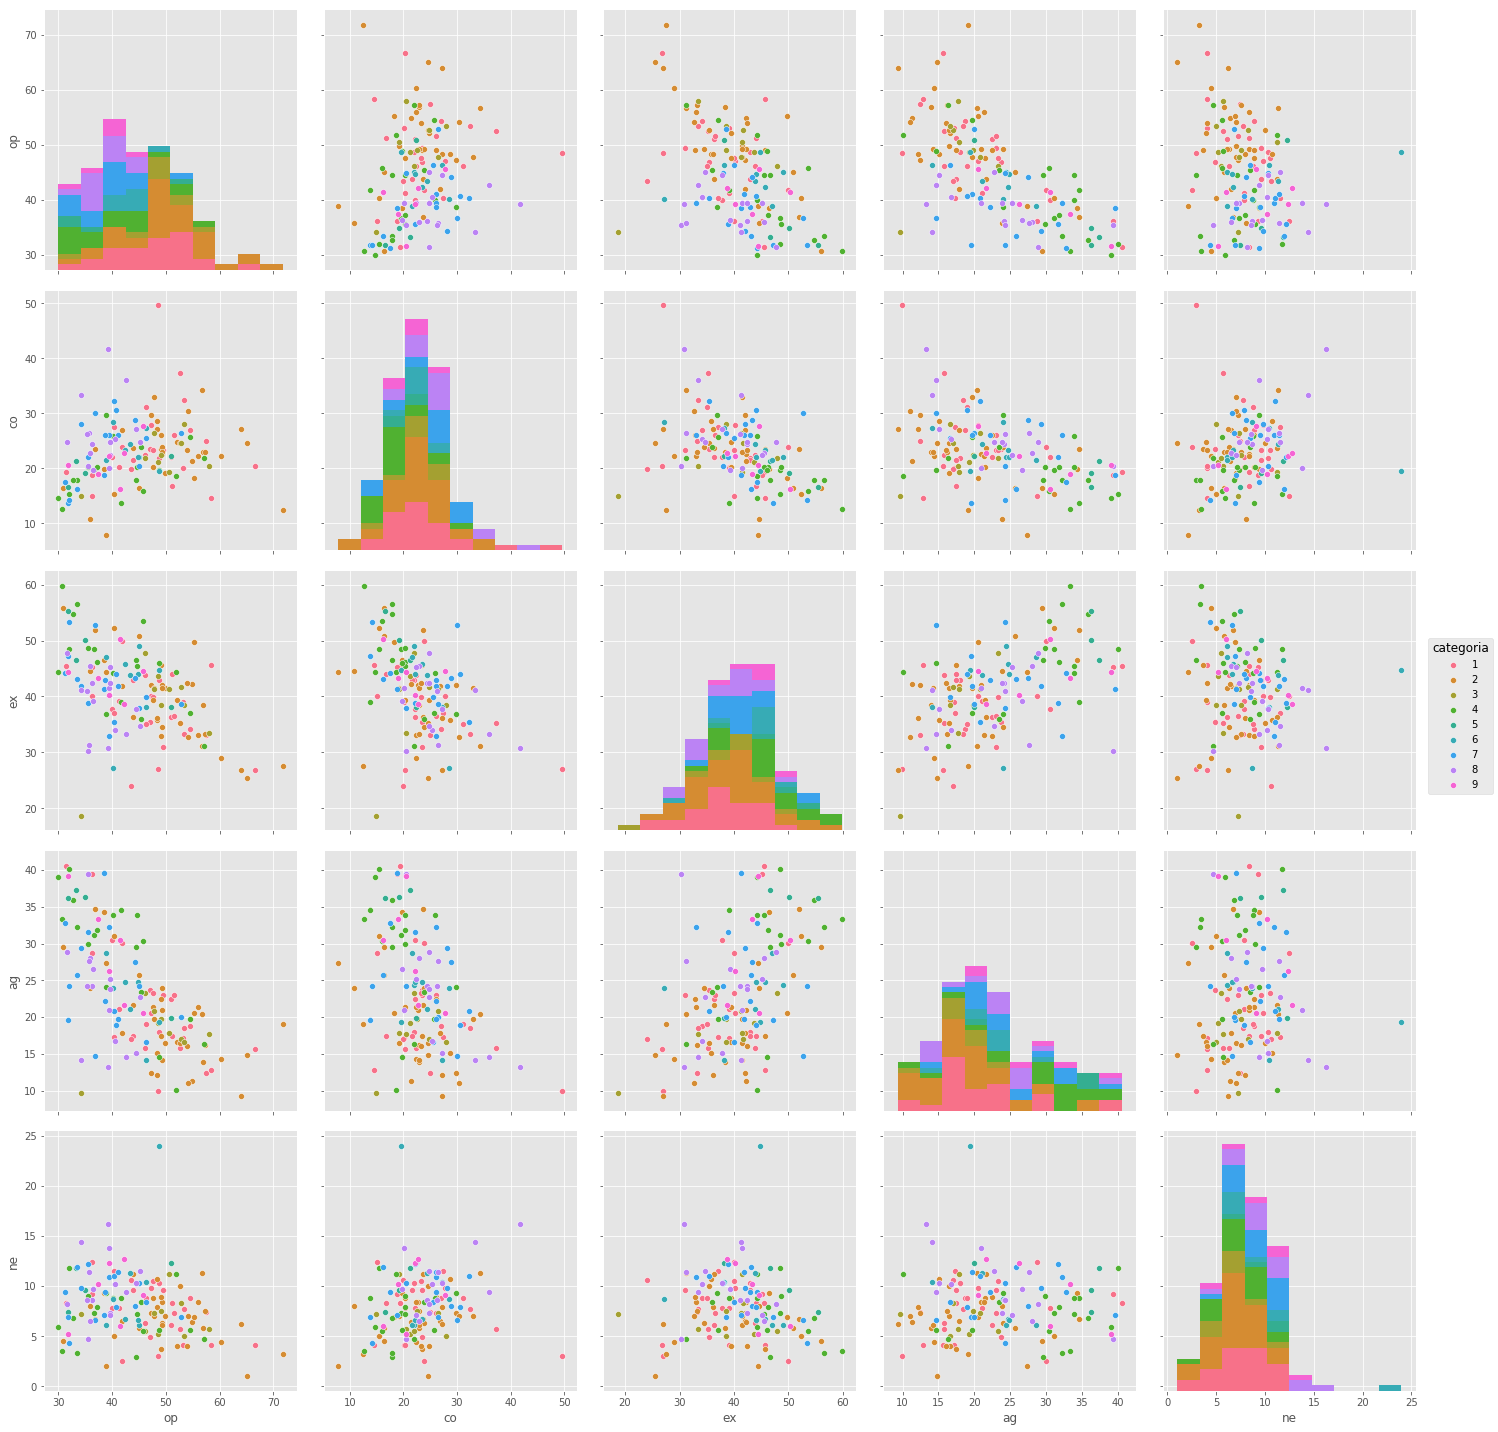

In [6]:
sb.pairplot(data.dropna(), hue='categoria',size=4,vars=["op","co","ex","ag","ne"],kind='scatter')

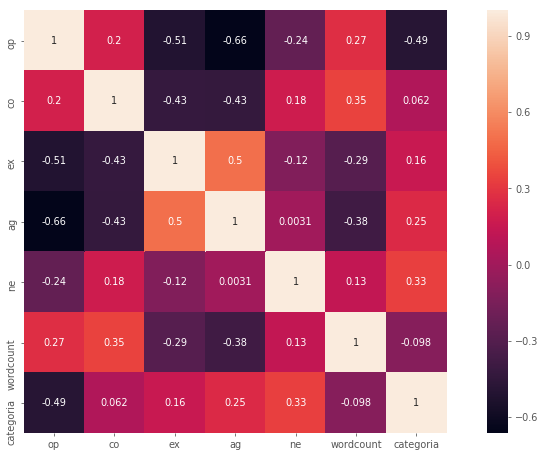

In [12]:
plt.figure(figsize=(15, 8), dpi=70)
plt.subplot(1,1,1)

sb.heatmap(data.corr(), square = True, annot = True)

In [21]:
X = pd.DataFrame(data = data.iloc[:,1:7])
y = pd.DataFrame(data = data['categoria'])
X.head()

,op,co,ex,ag,ne,wordcount
0,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945
1,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970
2,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604
3,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538
4,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645


In [22]:
y.head()

,categoria
0,7
1,7
2,4
3,2
4,4


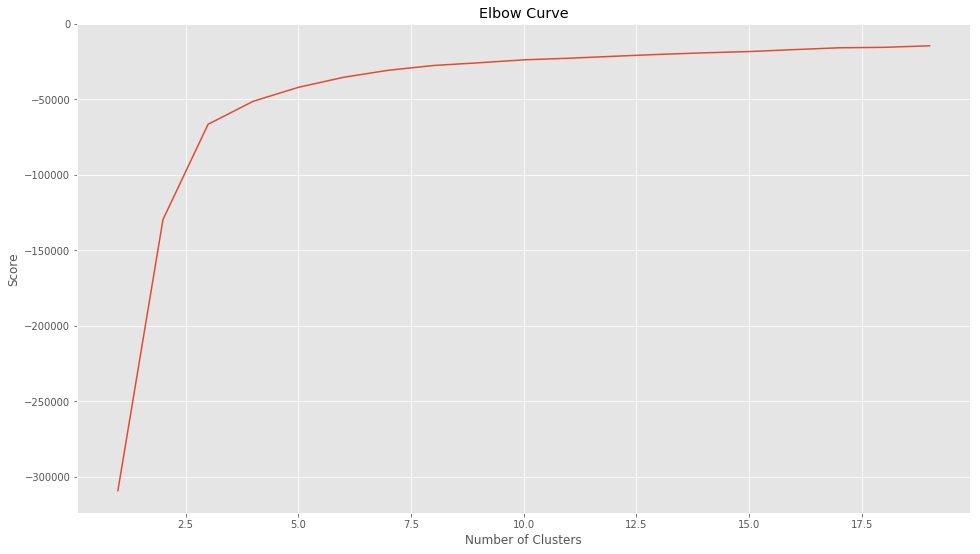

In [23]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()